In [18]:
import numpy as np
from specdb.specdb import SpecDB, IgmSpec
from astropy.io import fits

from funcs_query import query, pmf, identify

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from scipy.optimize import curve_fit

sof = 299792.458

In [6]:
igmsp = SpecDB('/media/bartosz/USB STICK/BOSS_DR14/IGMspec_DB_v03.1.hdf5')
meta = igmsp['BOSS_DR14'].meta
meta[1]

Database is igmspec
Created on 2019-Mar-06
Version: v03.1


RA_GROUP,DEC_GROUP,THING_ID,PLATE,MJD,FIBERID,Z,Z_ERR,Z_VI,Z_PIPE,Z_PIPE_ERR,ZWARNING,Z_PCA,Z_PCA_ER,Z_MGII,BOSS_TARGET1,ANCILLARY_TARGET1,ANCILLARY_TARGET2,EBOSS_TARGET0,EBOSS_TARGET1,EBOSS_TARGET2,N_SPEC_SDSS,N_SPEC_BOSS,N_SPEC,PLATE_DUPLICATE,MJD_DUPLICATE,FIBERID_DUPLICATE,BI_CIV,ERR_BI_CIV,RUN_NUMBER,COL_NUMBER,FIELD_NUMBER,PSFFLUX,IVAR_PSFFLUX,PSFMAG,ERR_PSFMAG,MI,GAL_EXT,RASS_COUNTS,RASS_COUNTS_SNR,SDSS2ROSAT_SEP,FLUX_0.2_2.0keV,FLUX_0.2_2.0keV_ERR,FLUX_2.0_12.0keV,FLUX_2.0_12.0keV_ERR,FLUX_0.2_12.0keV,FLUX_0.2_12.0keV_ERR,LUM_0.2_12.0keV,SDSS2XMM_SEP,GALEX_MATCHED,FUV,FUV_IVAR,NUV,NUV_IVAR,JMAG,ERR_JMAG,JSNR,JRDFLAG,HMAG,ERR_HMAG,HSNR,HRDFLAG,KMAG,ERR_KMAG,KSNR,KRDFLAG,SDSS2MASS_SEP,W1MAG,ERR_W1MAG,W1SNR,W1CHI2,W2MAG,ERR_W2MAG,W2SNR,W2CHI2,W3MAG,ERR_W3MAG,W3SNR,W3CHI2,W4MAG,ERR_W4MAG,W4SNR,W4CHI2,SDSS2WISE_SEP,UKIDSS_MATCHED,YFLUX,YFLUX_ERR,JFLUX,JFLUX_ERR,HFLUX,HFLUX_ERR,KFLUX,KFLUX_ERR,FIRST_MATCHED,FIRST_FLUX,FIRST_SNR,SDSS2FIRST_SEP,ORIG_ID,R,zem_GROUP,sig_zem,IGM_ID,NPIX,WV_MIN,WV_MAX,GROUP_ID,EPOCH,SDSS_NAME,SPECTRO,SOURCE_Z,SPECTRO_DUPLICATE,RERUN_NUMBER,OBJ_ID,CC_FLAGS,PH_FLAGS,flag_zem,CAT,DATE-OBS,INSTR,DISPERSER,TELESCOPE,STYPE,SPEC_FILE
float64,float64,int32,int16,int32,int16,float64,float64,float64,float64,float64,int16,float64,float64,float64,int64,int64,int64,int64,int64,int64,int16,int16,int16,int32[51],int32[51],int32[51],float64,float64,int16,int16,int16,float64[5],float64[5],float64[5],float64[5],float64,float64[5],float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float64,float64,float32,int16,float64,float64,float32,int16,float64,float64,float32,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float64,float64,float64,float64,int16,float64,float64,float64,int64,float64,float64,float64,int64,int64,float64,float64,int64,float64,str18,str4,str4,str1[51],str1,str1,str4,str4,str4,str4,str10,str4,str4,str10,str3,str26
0.00238,5.94190,163544156,8740,57367,694,2.1031202999999996,0.0,-1.0,2.1031203269958496,0.0009241577354259787,0,2.0996384999999997,2.0983490000000002,2.0983490000000002,0,0,0,0,2048,0,0,0,0,-1 .. -1,-1 .. -1,-1 .. -1,0.0,0.0,0,0,0,1.1197296380996704 .. 4.730101585388184,9.196866035461426 .. 0.8192309737205505,22.360628128051758 .. 20.78717613220215,0.3101848363876343 .. 0.2420300394296646,-24.732,0.2338263988494873 .. 0.06966802477836609,0.0,0.0,-1.0,nan,nan,nan,nan,nan,nan,nan,nan,1.0,0.0,0.0,0.0,0.0,nan,nan,nan,-1,nan,nan,nan,-1,nan,nan,nan,-1,nan,16.969,0.127,8.5,0.9904,16.887999999999998,0.409,2.700000047683716,1.004,11.861,nan,1.399999976158142,0.9819,8.604,0.127,0.699999988079071,0.9478,0.706171,1.0,1.2885136657753169e-31,2.4790984841010035e-32,1.229889058862803e-31,4.504542253745802e-32,1.496424644649041e-31,4.7290496259357616e-32,2.4598190249290145e-31,5.689571920868372e-32,0,-1.0,-1.0,-1.0,1,2100.0,2.103,0.0009241577354259787,1,4582,3619.9,10394.4,1,2000.0,000000.57+055630.8,BOSS,AUTO,- .. -,-,-,hH00,BCUU,AUTO,DR14,2015-12-11,BOSS,BOTH,SDSS 2.5-M,QSO,spec-8740-57367-0694.fits


In [7]:
fpath = '/media/bartosz/USB STICK/dr16q_prop_May16_2023.fits'

# Open the .fits file
with fits.open(fpath) as hdul:
    # Print information about the file
    hdul.info()

    # Access the data from the primary HDU (header/data unit)
    data1 = hdul[1].data

    # Optionally, you can also access the header
    header1 = hdul[1].header
    print(header1)

Filename: /media/bartosz/USB STICK/dr16q_prop_May16_2023.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU    236   750414R x 114C   [18A, K, K, K, D, D, 20A, 10A, D, 12A, D, D, D, D, D, 5D, 5D, 2D, 3D, 3D, D, D, 3D, 3D, D, D, D, D, D, D, D, D, D, D, D, D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 2D, 2D, 2D, 2D, 2D, 2D, 2D, 2D, 2D, 2D, D, D, D, D, D, D, D, D, D, D, D, D, 8D, 8D]   
  2                1 BinTableHDU    188   750414R x 90C   [5D, 5D, 5D, E, D, D, D, D, D, D, D, D, J, J, J, 5E, 5D, 5E, 5D, 5E, D, D, I, D, D, D, D, I, D, D, D, D, D, D, D, D, E, E, E, E, E, E, E, E, E, I, E, E, E, E, E, E, E, E, E, I, I, D, D, D, D, D, D, J, D, D, D, J, D, D, D, J, D, 21A, D, D, E, E, D, K, D, D, E, E, E, E, E, E, E, D] 

In [8]:
# Neighbor file
NN_file = np.loadtxt('/media/bartosz/USB STICK/highz_data/highZ_NN_corr_lbol10%.txt', dtype='str')     # Change file name depending on which
                                                                                                        # analysis
neighbors = NN_file[:,1:6]

# Meta file
hmeta = np.loadtxt('/media/bartosz/USB STICK/highz_data/meta_data_v2.txt', dtype='str')
z_meta = [float(z) for z in hmeta[:,1]]
snr_meta = [float(s) for s in hmeta[:,2]]

# Exclude:
exc = ['J1535+1943','PSOJ215.1514-16.0417','ULASJ0148+0600','ULASJ1207+0630','VIKJ2318-3029','PSOJ183-12']

NAMES = NN_file[:,0]
NAMES_v2, nn_list = [], []
HNAME, HZ, HSNR, NNID, NND = [], [], [], [], []
SDSSNAME, Z_SYS, Z_FIT, CIV_WL, V_SHIFT, V_SHIFT_ERR, V_SHIFT_CENTROID, V_SHIFT_CENTROID_ERR, MBH_CIV, MBH_CIV_ERR, MBH_MGII, MBH_MGII_ERR, MBH_HB, MBH_HB_ERR = [],[],[],[],[],[],[],[],[],[],[],[],[],[]
LOGLEDD, LOGLEDD_ERR, LOGLBOL, LOGLBOL_ERR, FLUX_CIV, FLUX_CIV_ERR, FLUX_SIIVOIV, FLUX_SIIVOIV_ERR, FLUX_NV, FLUX_NV_ERR = [],[],[],[],[],[],[],[],[],[]
for j, n in enumerate(NAMES):
    v=0
    if n in exc:
        print(n, '- skipped')
        continue

    NAMES_v2.append(n)
    nn_list.append(neighbors[j])
    hz = z_meta[j]
    hsnr = snr_meta[j]
    qlist = [int(o) for o in NN_file[:,1:6][j]]
    ndist = [float(d) for d in NN_file[:,6:][j]]
    for i,q in enumerate(qlist):
        wu_id = query(meta,data1,q)
        if type(wu_id) == np.int64:
            sdssname = data1[wu_id]['SDSS_NAME']
            z_sys = data1[wu_id]['Z_SYS']
            z_sys_err = data1[wu_id]['Z_SYS_ERR']
            z_fit = data1[wu_id]['Z_FIT']
            civ_wl = data1[wu_id]['CIV'][0]
            civ_wl_err = data1[wu_id]['CIV_ERR'][0]
            civ_centroid_wl = data1[wu_id]['CIV'][1]
            civ_centroid_wl_err = data1[wu_id]['CIV_ERR'][1]
            v_shift = (civ_wl*(1+z_fit)/(1+z_sys)-1549)*sof/1549
            v_shift_err = (1+z_fit)/(1+z_sys)*sof/1549*np.sqrt(civ_wl_err**2+(civ_wl*z_sys_err/(1+z_sys))**2)
            v_shift_centroid = (civ_centroid_wl*(1+z_fit)/(1+z_sys)-1549)*sof/1549
            v_shift_centroid_err = (1+z_fit)/(1+z_sys)*sof/1549*np.sqrt(civ_centroid_wl_err**2+(civ_centroid_wl*z_sys_err/(1+z_sys))**2)
            mbh_civ = data1[wu_id]['LOGMBH_CIV']
            mbh_civ_err = data1[wu_id]['LOGMBH_CIV_ERR']
            mbh_mgii = data1[wu_id]['LOGMBH_MGII']
            mbh_mgii_err = data1[wu_id]['LOGMBH_MGII_ERR']
            mbh_hb = data1[wu_id]['LOGMBH_HB']
            mbh_hb_err = data1[wu_id]['LOGMBH_HB_ERR']
            edd = data1[wu_id]['LOGLEDD_RATIO']
            edd_err = data1[wu_id]['LOGLEDD_RATIO_ERR']
            loglbol = data1[wu_id]['LOGLBOL']
            loglbol_err = data1[wu_id]['LOGLBOL_ERR']
            flux_civ = data1[wu_id]['CIV'][2]
            flux_civ_err = data1[wu_id]['CIV_ERR'][2]
            flux_siivoiv = data1[wu_id]['SIIV_OIV'][2]
            flux_siivoiv_err = data1[wu_id]['SIIV_OIV_ERR'][2]
            flux_nv = data1[wu_id]['NV1240'][2]
            flux_nv_err = data1[wu_id]['NV1240_ERR'][2]
        # elif type(wu_id) == np.ndarray:
        #     mbh = [data1[m]['LOGMBH_CIV'] for m in wu_id]
        elif wu_id == None:
            sdssname = '-'
            z_sys = 0
            z_sys_err = 0
            z_fit = 0
            civ_wl = 0
            civ_wl_err = 0
            v_shift = 0
            v_shift_err = 0
            v_shift_centroid = 0
            v_shift_centroid_err = 0
            mbh_civ = 0
            mbh_civ_err = 0
            mbh_mgii = 0
            mbh_mgii_err = 0
            mbh_hb = 0
            mbh_hb_err = 0
            edd = 0
            edd_err = 0
            loglbol = 0
            loglbol_err = 0
            flux_civ = 0
            flux_civ_err = 0
            flux_siivoiv = 0
            flux_siivoiv_err = 0
            flux_nv = 0
            flux_nv_err = 0
        HNAME.append(n)
        HZ.append(hz)
        HSNR.append(hsnr)
        NNID.append(q)
        NND.append(ndist[i])
        SDSSNAME.append(sdssname)
        Z_SYS.append(z_sys)
        Z_FIT.append(z_fit)
        CIV_WL.append(civ_wl)
        # if n == 'PSOJ011+09':
        #     print(n)
        #     v_shift=np.array([-2128.93288444, -2419.24191414, -1161.23611879, -1838.62385474, -2806.3206204 ])[v]  # corrected CIV blueshift
        #     # v_shift = np.array([-2128.93288444, -2128.93288444, -3096.6296501 , -1161.23611879, -1838.62385474])[v]  # uncorrected CIV blueshift
        #     v_shift_err=96.76967656552614
        #     v+=1
        V_SHIFT.append(v_shift)
        V_SHIFT_ERR.append(v_shift_err)
        V_SHIFT_CENTROID.append(v_shift_centroid)
        V_SHIFT_CENTROID_ERR.append(v_shift_centroid_err)
        MBH_CIV.append(mbh_civ)
        MBH_CIV_ERR.append(mbh_civ_err)
        MBH_MGII.append(mbh_mgii)
        MBH_MGII_ERR.append(mbh_mgii_err)
        MBH_HB.append(mbh_hb)
        MBH_HB_ERR.append(mbh_hb_err)
        LOGLBOL.append(loglbol)
        LOGLBOL_ERR.append(loglbol_err)
        LOGLEDD.append(edd)
        LOGLEDD_ERR.append(edd_err)
        FLUX_CIV.append(flux_civ)
        FLUX_CIV_ERR.append(flux_civ_err)
        FLUX_SIIVOIV.append(flux_siivoiv)
        FLUX_SIIVOIV_ERR.append(flux_siivoiv_err)
        FLUX_NV.append(flux_nv)
        FLUX_NV_ERR.append(flux_nv_err)

In [9]:
civ_errors_csv = np.loadtxt('/home/bartosz/Downloads/highz sample redshifts - MBH CIV errors.csv',delimiter=',',dtype='str')
names1 = civ_errors_csv[:,0]
civ_errors_plus = [float(c) for c in civ_errors_csv[:,1]]
civ_errors_minus = [float(c) for c in civ_errors_csv[:,2]]

mgii_errors_csv = np.loadtxt('/home/bartosz/Downloads/highz sample redshifts - MBH MgII errors.csv',delimiter=',',dtype='str')
names2 = mgii_errors_csv[:,0]
mgii_errors_plus = [float(m) for m in mgii_errors_csv[:,1]]
mgii_errors_minus = [float(m) for m in mgii_errors_csv[:,2]]

edd_ratios = np.loadtxt('/home/bartosz/Downloads/highz sample redshifts - Edd ratios.csv',delimiter=',',dtype='str')
names3 = edd_ratios[:,0]
civ_edd = [float(e) for e in edd_ratios[:,1]]
civ_edd_plus = [float(e) for e in edd_ratios[:,2]]
civ_edd_minus = [float(e) for e in edd_ratios[:,3]]

mgii_edd = [float(e) for e in edd_ratios[:,4]]
mgii_edd_plus = [float(e) for e in edd_ratios[:,5]]
mgii_edd_minus = [float(e) for e in edd_ratios[:,6]]

loglbols = np.loadtxt('/home/bartosz/Downloads/highz sample redshifts - Lbol.csv',delimiter=',',dtype='str')
names4 = loglbols[:,0]
loglbol = [float(l) for l in loglbols[:,1]]
loglbol_plus = [float(l) for l in loglbols[:,2]]
loglbol_minus = [float(l) for l in loglbols[:,3]]

civ_shifts = np.loadtxt('/home/bartosz/Downloads/highz sample redshifts - CIV shift.csv',delimiter=',',dtype='str')
names5 = civ_shifts[:,0]
civ_shift = [float(c) for c in civ_shifts[:,1]]
civ_shift_plus = [float(c) for c in civ_shifts[:,2]]
civ_shift_minus = [float(c) for c in civ_shifts[:,3]]

metals = np.loadtxt('/home/bartosz/Downloads/highz sample redshifts - metals.csv',delimiter=',',dtype='str')
names6 = metals[:,0]
NV = [float(m) for m in metals[:,1]]
NV_err = [float(m) for m in metals[:,2]]
SiIV_OIV = [float(m) for m in metals[:,3]]
SiIV_OIV_err = [float(m) for m in metals[:,4]]

EWs = np.loadtxt('/home/bartosz/Downloads/highz sample redshifts - EW.csv',delimiter=',',dtype='str')
names7 = EWs[:,0]
ew = [float(m) for m in EWs[:,1]]
ew_err = [float(m) for m in EWs[:,2]]

print(names1==names2,names2==names3,names3==names4,names4==names5,names5==names6,names6==names7)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True] [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True] [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True] [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True] [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  Tr

In [13]:
HMBH_MGII = [9.37,9.3,9.43,10.09,9.76,9.59,9.11,9.27,9.29,9.53,0,0,9.77,0,0,8.81,9.14,9.68,9.42,9.02,0,8.69,9.18,9.51,9.09,9,9.41,9.34,9.02,9.19,9.31,9.34,8.92,9.2]
HMBH_CIV = [9.51,9.47,9.55,9.82,9.55,10.15,9.28,9.45,9.5,9.28,0,0,9.41,0,8.77,8.63,8.82,9.14,9.32,8.77,0,0,9.5,9.61,9.74,9.23,9.29,9.45,9.54,9.29,9.52,9.58,9.26,9.39]

CIV_HMBH, CIV_PLUS, CIV_MINUS = [], [], []
MGII_HMBH, MGII_PLUS, MGII_MINUS = [], [], []
EDD_CIV, EDD_CIV_PLUS, EDD_CIV_MINUS, EDD_MGII, EDD_MGII_PLUS, EDD_MGII_MINUS, CIV_SHIFT, CIV_SHIFT_PLUS, CIV_SHIFT_MINUS = [],[],[],[],[],[],[],[],[]
LOGLBOL_XS, LOGLBOL_XS_PLUS, LOGLBOL_XS_MINUS, NV_METAL, NV_METAL_ERR, SIIV_OIV_METAL, SIIV_OIV_METAL_ERR, EW, EW_ERR = [],[],[],[],[],[],[],[],[]
for j, n in enumerate(NAMES_v2):
    if n in exc:
        print(n, '- skipped')
        continue
    qlist = [int(o) for o in nn_list[j]]
    # print(n,np.where(names1==n))
    id = np.where(names1==n)[0][0]
    for i,q in enumerate(qlist):
        CIV_HMBH.append(HMBH_CIV[id])
        CIV_PLUS.append(civ_errors_plus[id])
        CIV_MINUS.append(civ_errors_minus[id])

        MGII_HMBH.append(HMBH_MGII[j])
        MGII_PLUS.append(mgii_errors_plus[id])
        MGII_MINUS.append(mgii_errors_minus[id])

        EDD_CIV.append(civ_edd[id])
        EDD_CIV_PLUS.append(civ_edd_plus[id])
        EDD_CIV_MINUS.append(civ_edd_minus[id])
        EDD_MGII.append(mgii_edd[id])
        EDD_MGII_PLUS.append(mgii_edd_plus[id])
        EDD_MGII_MINUS.append(mgii_edd_minus[id])

        LOGLBOL_XS.append(loglbol[id])
        LOGLBOL_XS_PLUS.append(loglbol_plus[id])
        LOGLBOL_XS_MINUS.append(loglbol_minus[id])

        CIV_SHIFT.append(civ_shift[id])
        CIV_SHIFT_PLUS.append(civ_shift_plus[id])
        CIV_SHIFT_MINUS.append(civ_shift_minus[id])

        NV_METAL.append(NV[id])
        NV_METAL_ERR.append(NV_err[id])
        SIIV_OIV_METAL.append(SiIV_OIV[id])
        SIIV_OIV_METAL_ERR.append(SiIV_OIV_err[id])

        EW.append(ew[id])
        EW_ERR.append(ew_err[id])

col1 = fits.Column(name='NAME', format='22A', array=HNAME)
col2 = fits.Column(name='Z', format='D', array=HZ)
col3 = fits.Column(name='SNR', format='D', array=HSNR)
col301 = fits.Column(name='CIV_SHIFT_XS', format='D', array=CIV_SHIFT)
col302 = fits.Column(name='CIV_SHIFT_XS_plus', format='D', array=CIV_SHIFT_PLUS)
col303 = fits.Column(name='CIV_SHIFT_XS_minus', format='D', array=CIV_SHIFT_MINUS)
col31 = fits.Column(name='MBH_CIV_XS', format='D', array=CIV_HMBH)
col32 = fits.Column(name='MBH_CIV_XS_plus', format='D', array=CIV_PLUS)
col33 = fits.Column(name='MBH_CIV_XS_minus', format='D', array=CIV_MINUS)
col34 = fits.Column(name='MBH_MGII_XS', format='D', array=MGII_HMBH)
col35 = fits.Column(name='MBH_MGII_XS_plus', format='D', array=MGII_PLUS)
col36 = fits.Column(name='MBH_MGII_XS_minus', format='D', array=MGII_MINUS)
col37 = fits.Column(name='EDD_CIV_XS', format='D', array=EDD_CIV)
col38 = fits.Column(name='EDD_CIV_XS_plus', format='D', array=EDD_CIV_PLUS)
col39 = fits.Column(name='EDD_CIV_XS_minus', format='D', array=EDD_CIV_MINUS)
col40 = fits.Column(name='EDD_MGII_XS', format='D', array=EDD_MGII)
col41 = fits.Column(name='EDD_MGII_XS_plus', format='D', array=EDD_MGII_PLUS)
col42 = fits.Column(name='EDD_MGII_XS_minus', format='D', array=EDD_MGII_MINUS)
col430 = fits.Column(name='NV_CIV', format='D', array=NV_METAL)
col431 = fits.Column(name='NV_CIV_ERR', format='D', array=NV_METAL_ERR)
col432 = fits.Column(name='SIIV_OIV_CIV', format='D', array=SIIV_OIV_METAL)
col433 = fits.Column(name='SIIV_OIV_CIV_ERR', format='D', array=SIIV_OIV_METAL_ERR)
col440 = fits.Column(name='CIV_EW', format='D', array=EW)
col441 = fits.Column(name='CIV_EW_ERR', format='D', array=EW_ERR)
col4 = fits.Column(name='NN_ID', format='K', array=NNID)
col5 = fits.Column(name='NN_D', format='D', array=NND)
col6 = fits.Column(name='SDSS_NAME', format='18A', array=SDSSNAME)
col7 = fits.Column(name='Z_SYS', format='D', array=Z_SYS)
col71 = fits.Column(name='Z_FIT', format='D', array=Z_FIT)
col72 = fits.Column(name='CIV_WL', format='D', array=CIV_WL)
col73 = fits.Column(name='CIV_SHIFT', format='D', array=V_SHIFT)     # km/sec
col74 = fits.Column(name='CIV_SHIFT_ERR', format='D', array=V_SHIFT_ERR)
col75 = fits.Column(name='CIV_SHIFT_CENTROID', format='D', array=V_SHIFT_CENTROID)
col76 = fits.Column(name='CIV_SHIFT_CENTROID_ERR', format='D', array=V_SHIFT_CENTROID_ERR)
col8 = fits.Column(name='MBH_CIV', format='D', array=MBH_CIV)
col9 = fits.Column(name='MBH_CIV_ERR', format='D', array=MBH_CIV_ERR)
col10 = fits.Column(name='MBH_MGII', format='D', array=MBH_MGII)
col11 = fits.Column(name='MBH_MGII_ERR', format='D', array=MBH_MGII_ERR)
col12 = fits.Column(name='MBH_HB', format='D', array=MBH_HB)
col13 = fits.Column(name='MBH_HB_ERR', format='D', array=MBH_HB_ERR)
col14001 = fits.Column(name='LOGLBOL_XS', format='D', array=LOGLBOL_XS)
col14002 = fits.Column(name='LOGLBOL_XS_PLUS', format='D', array=LOGLBOL_XS_PLUS)
col14003 = fits.Column(name='LOGLBOL_XS_MINUS', format='D', array=LOGLBOL_XS_MINUS)
col1400 = fits.Column(name='LOGLBOL', format='D', array=LOGLBOL)
col1401 = fits.Column(name='LOGLBOL_ERR', format='D', array=LOGLBOL_ERR)
col140 = fits.Column(name='LOGLEDD_RATIO', format='D', array=LOGLEDD)
col141 = fits.Column(name='LOGLEDD_RATIO_ERR', format='D', array=LOGLEDD_ERR)
col15 = fits.Column(name='CIV_FLUX', format='D', array=FLUX_CIV)
col16 = fits.Column(name='CIV_FLUX_ERR', format='D', array=FLUX_CIV_ERR)
col17 = fits.Column(name='SIIV_OIV_FLUX', format='D', array=FLUX_SIIVOIV)
col18 = fits.Column(name='SIIV_OIV_FLUX_ERR', format='D', array=FLUX_SIIVOIV_ERR)
col19 = fits.Column(name='NV_FLUX', format='D', array=FLUX_NV)
col20 = fits.Column(name='NV_FLUX_ERR', format='D', array=FLUX_NV_ERR)
                    
cols = fits.ColDefs([col1, col2, col3, col301, col302, col303, col31, col32, col33, col34, col35, col36, col37, col38, col39, 
                     col40, col41, col42, col430, col431, col432, col433, col440, col441, col14001, col14002, col14003, col4, col5, col6, col7, 
                     col71, col72, col73, col74, col75, col76, col8, col9, col10, col11, col12, col13, 
                     col1400, col1401, col140, col141, col15, col16, col17, col18, col19, col20])

hdu = fits.BinTableHDU.from_columns(cols)

hdu.writeto('/media/bartosz/USB STICK/highz_data/nn_properties_corr_lbol10%_updated.fits', overwrite=True)     # Change file save name 

In [2]:
# Change file name     
# with fits.open('/media/bartosz/USB STICK/highz_data/nn_properties_ext_uncorr.fits') as hdul:
# with fits.open('/media/bartosz/USB STICK/highz_data/nn_properties_ext_plclbound.fits') as hdul:  
# with fits.open('/media/bartosz/USB STICK/highz_data/nn_properties_uncorr_lbol10%.fits') as hdul:
with fits.open('/media/bartosz/USB STICK/highz_data/nn_properties_corr_lbol10%_updated.fits') as hdul:
    hdul.info()
    header = hdul[1].header
    print(header)
    data = hdul[1].data

Filename: /media/bartosz/USB STICK/highz_data/nn_properties_corr_lbol10%_updated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU    114   170R x 53C   [22A, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, K, D, 18A, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D]   
XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                  448 / length of dimension 1                          NAXIS2  =                  170 / length of dimension 2                          PCOUNT  =                    0 / number of group parameters                     GCOUNT  =                    1 / number of groups                               TFIELDS =          

In [20]:
data['SDSS_NAME'][np.where(data['NAME']=='J0108+0711')[0]]

chararray(['145307.24+133951.3', '081159.16+104341.9',
           '142745.85+260853.8', '093554.88+520627.9',
           '113925.32+432157.2'], dtype='<U18')

In [3]:
cmap = plt.get_cmap('tab10')
colors = cmap(range(7))
markers = ['o', 's', '^', 'x', '*']
j,k=0,0
MARKERS,COLORS=[],[]
for i in range(len(data['NAME'])):
    MARKERS.append(markers[k])
    COLORS.append(colors[j])
    if (i+1)%5==0:
        j+=1
    if (i+1)%35==0:
        k+=1
        j=0
# COLORS

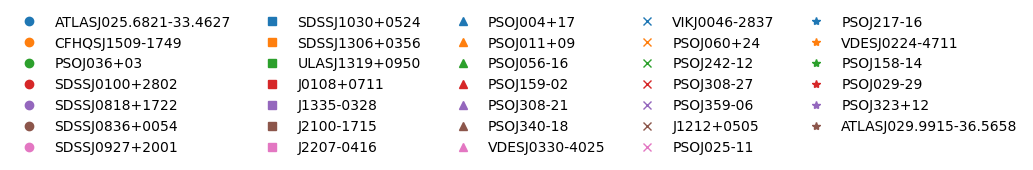

In [15]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

lelem=[]
labels=[]
for i,d in enumerate(data):
    if i%5==0:
        lelem.append(Line2D([0],[0],color=COLORS[i],marker=MARKERS[i],lw=0,label=d['NAME']))
        labels.append(d['NAME'])

# Create a separate figure for the legend
fig_legend = plt.figure()
fig_legend.set_figheight(1)
ax_legend = fig_legend.add_subplot()
fig_legend.legend(lelem, labels,loc='center', ncol=5,frameon=False)

# Remove axes from the legend figure
ax_legend.axis('off')
plt.tight_layout()
fig_legend.savefig('plots/analysis_plots/legend.pdf', bbox_inches='tight')

plt.show()

In [53]:
# ledd = 1.3*10**38*10**(data['MBH_CIV'])
# # print(ledd)
# plt.scatter(10**data['LOGLEDD_RATIO'],10**(data['LOGLBOL'])/ledd)
# ledd = 1.3*10**38*10**(data['MBH_MGII'])
# plt.scatter(10**data['LOGLEDD_RATIO'],10**(data['LOGLBOL'])/ledd)
# ledd = 1.3*10**38*10**(data['MBH_HB'])
# plt.scatter(10**data['LOGLEDD_RATIO'],10**(data['LOGLBOL'])/ledd)
# plt.xlim(0,2)
# plt.ylim(0,2)
# plt.show()

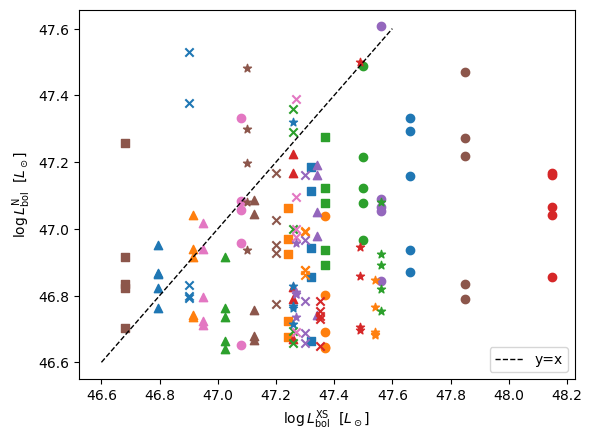

In [49]:
mask1 = data['LOGLBOL']!=0
mask2 = data['LOGLBOL_XS']!=0
mask = np.logical_and(mask1,mask2)

for i,b in enumerate(mask):
    if b == False:
        continue
    d = data[i]
    # minus=np.sqrt(d['LOGLBOL_ERR']**2+d['LOGLBOL_XS_minus']**2)
    # plus=np.sqrt(d['LOGLBOL_ERR']**2+d['LOGLBOL_XS_plus']**2)
    # plt.scatter(d['NN_D'],d['LOGLBOL']-d['LOGLBOL_XS'],color=COLORS[i],marker=MARKERS[i])
    # plt.errorbar(d['NN_D'],d['LOGLBOL']-d['LOGLBOL_XS'],yerr=[[minus],[plus]],color=COLORS[i],marker=MARKERS[i],lw=0.5)

    minus=d['LOGLBOL_XS_minus']
    plus=d['LOGLBOL_XS_plus']
    plt.scatter(d['LOGLBOL_XS'],d['LOGLBOL'],color=COLORS[i],marker=MARKERS[i])
    # plt.errorbar(d['LOGLBOL_XS'],d['LOGLBOL'],xerr=[[minus],[plus]],yerr=d['LOGLBOL_ERR'],color=COLORS[i],marker=MARKERS[i],lw=0.5)

plt.plot([46.6,47.6],[46.6,47.6],ls='--',c='black',lw=1,label='y=x')
# plt.xlabel(r'$d_\text{N}$')
# plt.ylabel(r'$\Delta \log L_\text{bol}$  [$M_\odot$]')
plt.xlabel(r'$\log L_\text{bol}^\text{XS}$  [$L_\odot$]')
plt.ylabel(r'$\log L_\text{bol}^\text{N}$  [$L_\odot$]')
plt.legend(loc='lower right')
plt.savefig('plots/analysis_plots/loglbol_Lmatched_corr.pdf', bbox_inches='tight')
plt.show()

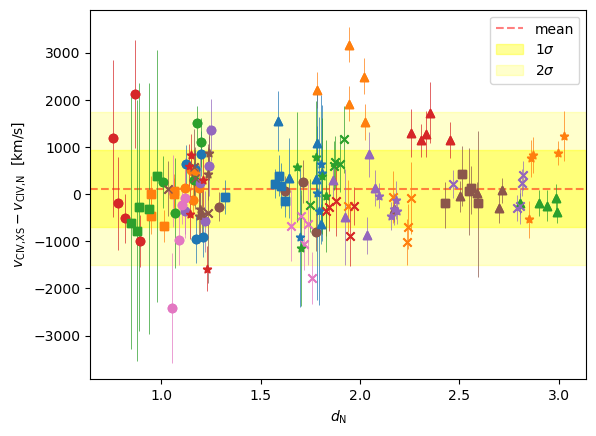

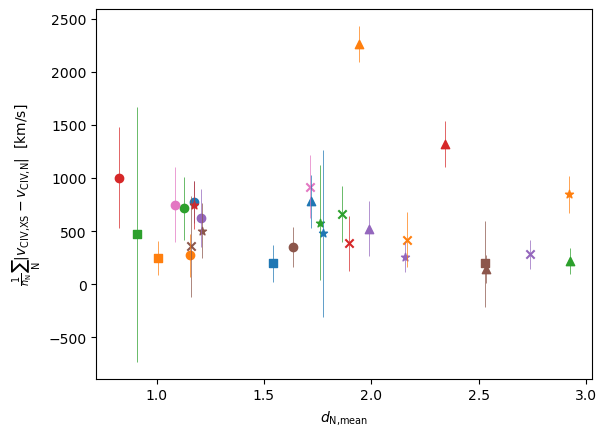

In [45]:
mask1 = data['CIV_SHIFT_XS'] != 0
mask2 = data['CIV_SHIFT'] > -100000
mask3 = data['CIV_SHIFT'] != 0
mask12 = np.logical_and(mask1,mask2)
mask = np.logical_and(mask12,mask3)
# plt.scatter(data[mask]['CIV_SHIFT_XS'],-1*data[mask]['CIV_SHIFT'])
# plt.errorbar(data[mask]['CIV_SHIFT_XS'],-1*data[mask]['CIV_SHIFT'], 
#              yerr=[data[mask]['CIV_SHIFT_XS_minus'],data[mask]['CIV_SHIFT_XS_plus']], 
#              ls='')#, color=colors[k],alpha=0.7)
# plt.show()
diff=[]
for i,b in enumerate(mask):
    d=data[i]
    if b==False:
        continue
    plus = np.sqrt(d['CIV_SHIFT_XS_plus']**2+d['CIV_SHIFT_ERR']**2)
    minus = np.sqrt(d['CIV_SHIFT_XS_minus']**2+d['CIV_SHIFT_ERR']**2)
    diff.append(d['CIV_SHIFT_XS']+d['CIV_SHIFT'])
    plt.scatter(d['NN_d'],d['CIV_SHIFT_XS']+d['CIV_SHIFT'],color=COLORS[i],marker=MARKERS[i])
    plt.errorbar(d['NN_d'],d['CIV_SHIFT_XS']+d['CIV_SHIFT'],yerr=[[minus],[plus]],color=COLORS[i],marker=MARKERS[i],lw=0.5)
plt.axhline(np.mean(diff),color='red',ls='--',alpha=0.5,zorder=0.5,label='mean')
plt.axhspan(np.mean(diff)-np.std(diff),np.mean(diff)+np.std(diff),color='yellow',alpha=0.4,zorder=0,label=r'$1\sigma$')
plt.axhspan(np.mean(diff)-2*np.std(diff),np.mean(diff)+2*np.std(diff),color='yellow',alpha=0.2,zorder=0,label=r'$2\sigma$')
plt.legend()
plt.xlabel(r'$d_\text{N}$')
plt.ylabel(r'$v_\text{CIV,XS} - v_\text{CIV,N}$  [km/s]')
plt.savefig('plots/analysis_plots/civ_blueshift.pdf',bbox_inches='tight')
plt.show()


j,n=0,0
dev,dN=0,0
dev_err_minus,dev_err_plus=0,0
for i,b in enumerate(mask):
    d=data[i]
    j+=1
    dN += d['NN_d']
    if b==False and j==5 and n==0:
        j,n=0,0
        dN,dev=0,0
        dev_err_minus,dev_err_plus=0,0
        continue
    elif b==False and j==5 and n!=0:
        plt.scatter(dN/5,dev/n,color=COLORS[i],marker=MARKERS[i])
        minus = np.sqrt(dev_err_minus)/n
        plus = np.sqrt(dev_err_plus)/n
        plt.errorbar(dN/5,dev/n,yerr=[[minus],[plus]],color=COLORS[i],lw=0.5)
        dN,dev=0,0
        j,n=0,0
        dev_err_minus,dev_err_plus=0,0
        continue
    elif b==False and j!=5:
        continue
    n+=1
    dev += abs(d['CIV_SHIFT_XS']+d['CIV_SHIFT'])
    dev_err_minus += d['CIV_SHIFT_XS_minus']**2+d['CIV_SHIFT_ERR']**2
    dev_err_plus += d['CIV_SHIFT_XS_plus']**2+d['CIV_SHIFT_ERR']**2
    if j==5:
        j=0
        plt.scatter(dN/5,dev/n,color=COLORS[i],marker=MARKERS[i])
        minus = np.sqrt(dev_err_minus)/n
        plus = np.sqrt(dev_err_plus)/n
        plt.errorbar(dN/5,dev/n,yerr=[[minus],[plus]],color=COLORS[i],lw=0.5)
        dN,dev=0,0
        n=0
        dev_err_minus,dev_err_plus=0,0
    # print(d['NAME'],d['CIV_SHIFT_XS'],d['CIV_SHIFT'],d['CIV_CENTROID'])
    # print(j)
# plt.scatter(data[mask]['NN_d'],abs(data[mask]['CIV_SHIFT_XS']-(-1*data[mask]['CIV_SHIFT'])))
# plt.plot([0,5000],[0,5000])
plt.xlabel(r'$d_\text{N,mean}$')
plt.ylabel(r'$\frac{1}{n_\text{N}}\sum_\text{N} | v_\text{CIV,XS} - v_\text{CIV,N} | $  [km/s]')
# plt.ylim(-100,2400)
plt.savefig('plots/analysis_plots/civ_blueshift_average.pdf',bbox_inches='tight')
plt.show()

ULASJ1319+0950
ULASJ1319+0950
ULASJ1319+0950
ULASJ1319+0950
ULASJ1319+0950


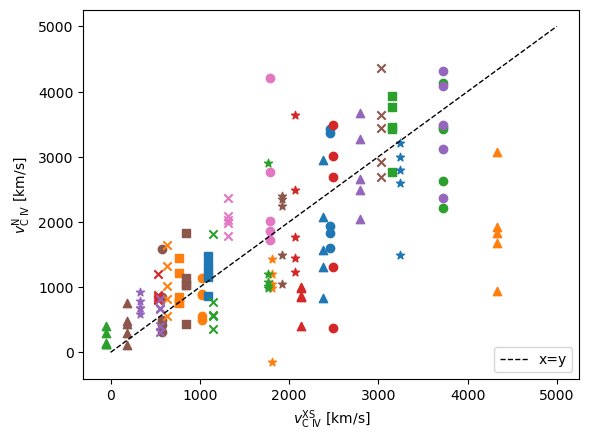

In [7]:
# plt.rcParams.update({'font.size': 14})
mask1 = data['CIV_SHIFT_XS'] != 0
mask2 = data['CIV_SHIFT'] > -100000
mask3 = data['CIV_SHIFT'] != 0
mask12 = np.logical_and(mask1,mask2)
mask = np.logical_and(mask12,mask3)

plt.figure()
plt.plot([0,5000],[0,5000],c='black',ls='--',lw=1,label='x=y')
for i,b in enumerate(mask):
    if b == False:
        continue
    d = data[i]
    if d['NAME']=='ULASJ1319+0950':
        plt.scatter(d['CIV_SHIFT_XS'],-d['CIV_SHIFT'],color=COLORS[i],marker=MARKERS[i])
        print(d['NAME'])
        continue
    # elif d['Name']=='PSOJ011+09':
    #     print(d['NAME'])
    #     continue
    
    plt.scatter(d['CIV_SHIFT_XS'],-d['CIV_SHIFT'],color=COLORS[i],marker=MARKERS[i])
    plt.errorbar(d['CIV_SHIFT_XS'],-d['CIV_SHIFT'],xerr=d['CIV_SHIFT_XS_minus'],yerr=d['CIV_SHIFT_ERR'],color=COLORS[i],marker=MARKERS[i],lw=0.5)
# # plt.ylim(-2,2)
plt.xlabel(r'$v_\text{C IV}^\text{XS}$ [km/s]')
plt.ylabel(r'$v_\text{C IV}^\text{N}$ [km/s]')
# plt.xlabel('high-z C IV blueshift [km/s]')
# plt.ylabel('neighbor C IV blueshift [km/s]')
plt.legend(loc='lower right')
plt.savefig('plots/analysis_plots/blueshifts_Lmatched_corr.pdf', bbox_inches='tight')
plt.show()

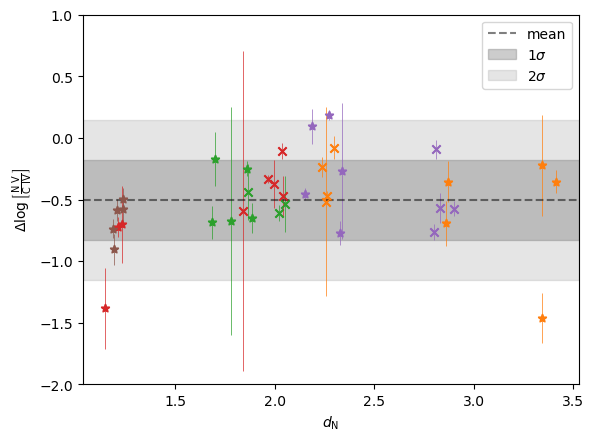

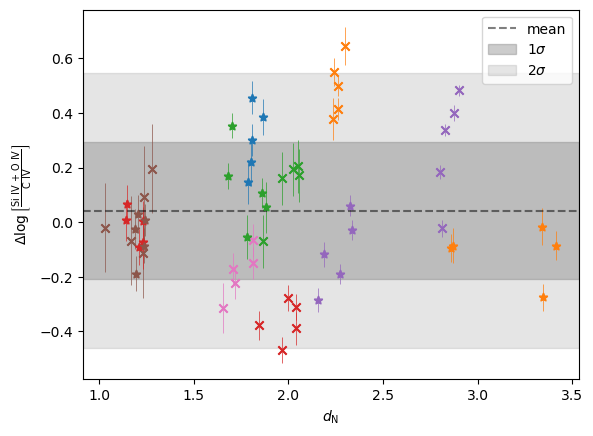

In [52]:
mask1 = data['NV_CIV'] != 0
mask2 = data['NV_FLUX'] != 0
mask = np.logical_and(mask1,mask2)

DIFF=[]
for i,b in enumerate(mask):
    if b==False:
        continue
    d = data[i]
    nv_civ_n = d['NV_FLUX']/d['CIV_FLUX']
    err = np.sqrt((d['NV_FLUX_ERR']/d['CIV_FLUX'])**2+(d['CIV_FLUX_ERR']*d['NV_FLUX']/d['CIV_FLUX']**2)**2)
    err2 = np.sqrt((err/d['NV_CIV'])**2+(nv_civ_n*d['NV_CIV_ERR']/d['NV_CIV'])**2) / (nv_civ_n/d['NV_CIV']) / np.log(10)
    plt.scatter(d['NN_D'],np.log10(nv_civ_n/d['NV_CIV']),marker=MARKERS[i],color=COLORS[i])
    plt.errorbar(d['NN_D'],np.log10(nv_civ_n/d['NV_CIV']),yerr=err2,color=COLORS[i],marker=MARKERS[i],lw=0.5)
    DIFF.append(np.log10(nv_civ_n/d['NV_CIV']))

plt.axhline(np.mean(DIFF),c='black',ls='--',alpha=0.5,label='mean')
plt.axhspan(np.mean(DIFF)-np.std(DIFF),np.mean(DIFF)+np.std(DIFF),color='grey',alpha=0.4,zorder=0,label=r'$1\sigma$')
plt.axhspan(np.mean(DIFF)-2*np.std(DIFF),np.mean(DIFF)+2*np.std(DIFF),color='grey',alpha=0.2,zorder=0,label=r'$2\sigma$')
plt.ylim(-2,1)
plt.xlabel(r'$d_\text{N}$')
# plt.ylabel(r'$\log\left[\frac{\text{N V}}{\text{C IV}}\right]_\text{N} - \log\left[\frac{\text{N V}}{\text{C IV}}\right]_\text{XS}$')
plt.ylabel(r'$\Delta\log\left[\frac{\text{N V}}{\text{C IV}}\right]$')
plt.legend(loc='upper right')
plt.savefig('plots/analysis_plots/flux_ratio_nv_Lmatched_corr.pdf',bbox_inches='tight')
plt.show()


mask1 = data['SIIV_OIV_CIV'] != 0
mask2 = data['SIIV_OIV_FLUX'] != 0
mask = np.logical_and(mask1,mask2)

DIFF=[]
for i,b in enumerate(mask):
    if b==False:
        continue
    d = data[i]
    siiv_civ_n = d['SIIV_OIV_FLUX']/d['CIV_FLUX']
    err = np.sqrt((d['SIIV_OIV_FLUX_ERR']/d['CIV_FLUX'])**2+(d['CIV_FLUX_ERR']*d['SIIV_OIV_FLUX']/d['CIV_FLUX']**2)**2)
    err2 = np.sqrt((err/d['SIIV_OIV_CIV'])**2+(siiv_civ_n*d['SIIV_OIV_CIV_ERR']/d['SIIV_OIV_CIV'])**2) / (siiv_civ_n/d['SIIV_OIV_CIV']) / np.log(10)
    plt.scatter(d['NN_D'],np.log10(siiv_civ_n/d['SIIV_OIV_CIV']),marker=MARKERS[i],color=COLORS[i])
    plt.errorbar(d['NN_D'],np.log10(siiv_civ_n/d['SIIV_OIV_CIV']),yerr=err2,color=COLORS[i],marker=MARKERS[i],lw=0.5)
    DIFF.append(np.log10(siiv_civ_n/d['SIIV_OIV_CIV']))

plt.axhline(np.mean(DIFF),c='black',ls='--',alpha=0.5,label='mean')
plt.axhspan(np.mean(DIFF)-np.std(DIFF),np.mean(DIFF)+np.std(DIFF),color='grey',alpha=0.4,zorder=0,label=r'$1\sigma$')
plt.axhspan(np.mean(DIFF)-2*np.std(DIFF),np.mean(DIFF)+2*np.std(DIFF),color='grey',alpha=0.2,zorder=0,label=r'$2\sigma$')
# plt.ylim(0,5)
plt.xlabel(r'$d_\text{N}$')
# plt.ylabel(
#     r'$\log\left[\frac{\text{Si IV + O IV}}{\text{C IV}}\right]_\text{N} - \log\left[\frac{\text{Si IV + O IV}}{\text{C IV}}\right]_\text{high-z}$')
plt.ylabel(r'$\Delta\log\left[\frac{\text{Si IV + O IV}}{\text{C IV}}\right]$')
plt.legend(loc='upper right')
plt.savefig('plots/analysis_plots/flux_ratio_siiv_oiv_Lmatched_corr.pdf',bbox_inches='tight')
plt.show()

/tmp/ipykernel_9080/1208732190.py:37: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(d['NN_D'],diff, c=COLORS[i], marker=MARKERS[i])#,alpha=alpha)#,'ro')


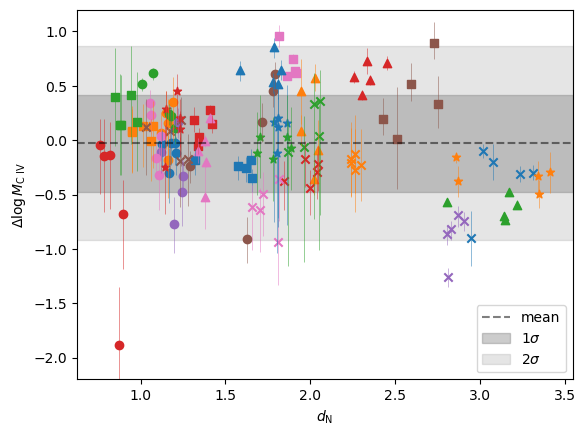

In [26]:
# plt.rcParams.update({'font.size': 14})
mask1 = data['MBH_CIV_XS'] != 0
mask2 = data['MBH_CIV'] != -100
mask3 = data['MBH_CIV'] != 0
mask12 = np.logical_and(mask1,mask2)
mask = np.logical_and(mask12,mask3)
data2 = data[mask]

cmap = plt.get_cmap('tab10')
colors = cmap(range(10))
#markers = ['o']*10 + ['s']*10 + ['^']*10 + ['x']*10 # + ['*']*5
markers = ['o', 's', '^', 'x', '*']

j,k,l=-1,-1,0
fig = plt.figure()
# plt.axhline(0,c='black',ls='--',alpha=0.5)
someX, someY = 2, 5
# currentAxis = plt.gca()
# currentAxis.add_patch(Rectangle((0.8,-1.3), 2.2, 2.2, facecolor="white", edgecolor='black'))
DIFF=[]
for i, b in enumerate(mask):
# for i, d in enumerate(data2):
    if i % 5 == 0:
        k+=1
        l=0
    if i % 50 == 0:        
        j+=1
        k=0
    if b==False:
        continue
    else: d=data[i]
    # alpha=alphas[l]
    l+=1
    plus = np.sqrt(d['MBH_CIV_ERR']**2+d['MBH_CIV_XS_plus']**2)
    minus = np.sqrt(d['MBH_CIV_ERR']**2+d['MBH_CIV_XS_minus']**2)
    diff = d['MBH_CIV']-d['MBH_CIV_XS']
    plt.scatter(d['NN_D'],diff, c=COLORS[i], marker=MARKERS[i])#,alpha=alpha)#,'ro')
    plt.errorbar(d['NN_D'],diff, yerr=[[minus],[plus]], color=COLORS[i],alpha=0.7,lw=0.5)#, fmt='o', capsize=5, label='Error Bars')
    # plt.errorbar(d['NN_D'],diff, c=colors[k])#, fmt='o', capsize=5, label='Error Bars')
    DIFF.append(diff)

plt.axhline(np.mean(DIFF),c='black',ls='--',alpha=0.5,label='mean')
plt.axhspan(np.mean(DIFF)-np.std(DIFF),np.mean(DIFF)+np.std(DIFF),color='grey',alpha=0.4,zorder=0,label=r'$1\sigma$')
plt.axhspan(np.mean(DIFF)-2*np.std(DIFF),np.mean(DIFF)+2*np.std(DIFF),color='grey',alpha=0.2,zorder=0,label=r'$2\sigma$')
#plt.scatter(data1['NN_D'],data1['MBH_CIV']/data1['MBH'], c=colors, marker=markers)#,'ro')
plt.ylim(-2.2,1.2)
# plt.ylim(-2.55,1.2)
# plt.xlim(0.55,3.1)
#plt.plot([0,10],[0,10],ls='-')
# plt.ylabel(r'$\log M_\text{CIV,N} - \log M_\text{CIV,high-z}$')
plt.ylabel(r'$\Delta\log M_\text{C IV}$')
plt.xlabel(r'$d_\text{N}$')
plt.legend(loc='lower right')
plt.savefig('plots/analysis_plots/MBH_civ_Lmatched_corr.pdf',bbox_inches='tight')
plt.show()
plt.close()

/tmp/ipykernel_6936/2185524508.py:39: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(d['NN_D'],diff,c=COLORS[i], marker=MARKERS[i])#,alpha=alpha)#,'ro')


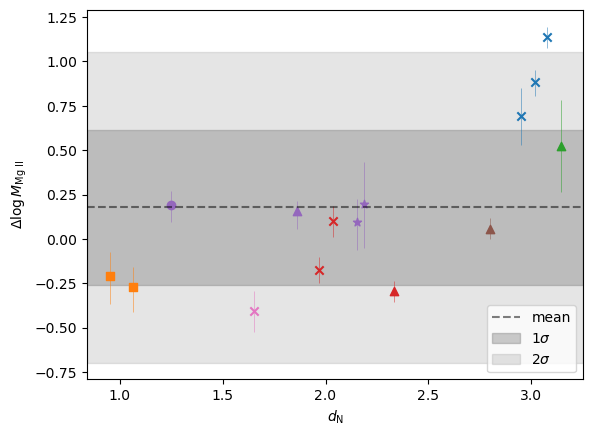

In [53]:
mask1 = data['MBH_MGII_XS'] != 0
mask2 = data['MBH_MGII'] != -100
mask3 = data['MBH_MGII'] != 0
mask12 = np.logical_and(mask1,mask2)
mask = np.logical_and(mask12,mask3)
data12 = data[mask]
cmap = plt.get_cmap('tab10')

colors = cmap(range(10))
#markers = ['o']*10 + ['s']*10 + ['^']*10 + ['x']*10 # + ['*']*5
markers = ['o', 's', '^', 'x', '*']
alphas = [1,0.9,0.7,0.6,0.5]

j,k,l=-1,-1,0
fig = plt.figure()
# plt.axhline(0,c='black',ls='--',alpha=0.5)
# someX, someY = 2, 5
# currentAxis = plt.gca()
# currentAxis.add_patch(Rectangle((0.8,-1.3), 2.2, 2.2, facecolor="white", edgecolor='black'))
DIFF=[]
for i, b in enumerate(mask):
# for i, d in enumerate(data12):
    if i % 5 == 0:
        k+=1
        l=0
    if i % 50 == 0:        
        j+=1
        k=0
    if b==False:
        continue
    else: d=data[i]
    marker=markers[j]
    # alpha=alphas[l]
    l+=1
    #print(d['MBH_CIV_ERR'])
    plus = np.sqrt(d['MBH_MGII_ERR']**2+d['MBH_MGII_XS_plus']**2)
    minus = np.sqrt(d['MBH_MGII_ERR']**2+d['MBH_MGII_XS_minus']**2)
    diff = d['MBH_MGII']-d['MBH_MGII_XS']
    plt.scatter(d['NN_D'],diff,c=COLORS[i], marker=MARKERS[i])#,alpha=alpha)#,'ro')
    plt.errorbar(d['NN_D'],diff, yerr=[[minus],[plus]], c=COLORS[i],alpha=0.7,lw=0.5)#, fmt='o', capsize=5, label='Error Bars')
    # plt.errorbar(d['NN_D'],d['MBH_MGII']-d['MBH_MGII_XS'], c=colors[k])#, fmt='o', capsize=5, label='Error Bars')
    DIFF.append(diff)

plt.axhline(np.mean(DIFF),c='black',ls='--',alpha=0.5,label='mean')
plt.axhspan(np.mean(DIFF)-np.std(DIFF),np.mean(DIFF)+np.std(DIFF),color='grey',alpha=0.4,zorder=0,label=r'$1\sigma$')
plt.axhspan(np.mean(DIFF)-2*np.std(DIFF),np.mean(DIFF)+2*np.std(DIFF),color='grey',alpha=0.2,zorder=0,label=r'$2\sigma$')
#plt.scatter(data1['NN_D'],data1['MBH_CIV']/data1['MBH'], c=colors, marker=markers)#,'ro')
#plt.ylim(0.7,1.2)
# plt.ylim(-2,2)
# plt.xlim(0.55,6.05)
#plt.plot([0,10],[0,10],ls='-')
# plt.ylabel(r'$\log M_\text{MgII,NN} - \log M_\text{MgII,XS}$')
plt.ylabel(r'$\Delta\log M_\text{Mg II}$')
plt.xlabel(r'$d_\text{N}$')
plt.legend(loc='lower right')
plt.savefig('plots/analysis_plots/MBH_mgii_Lmatched_corr.pdf',bbox_inches='tight')
plt.show()
plt.close()

/tmp/ipykernel_6936/3669015544.py:39: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(d['NN_D'],10**d['LOGLEDD_RATIO']/d['EDD_CIV_XS'], c=COLORS[i], marker=MARKERS[i])#,alpha=alpha)#,'ro')


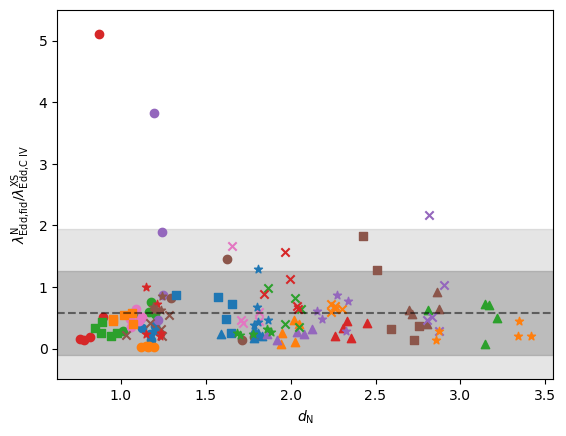

/tmp/ipykernel_6936/3669015544.py:85: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(d['NN_D'],ratio, c=COLORS[i], marker=MARKERS[i])#,alpha=alpha)#,'ro')


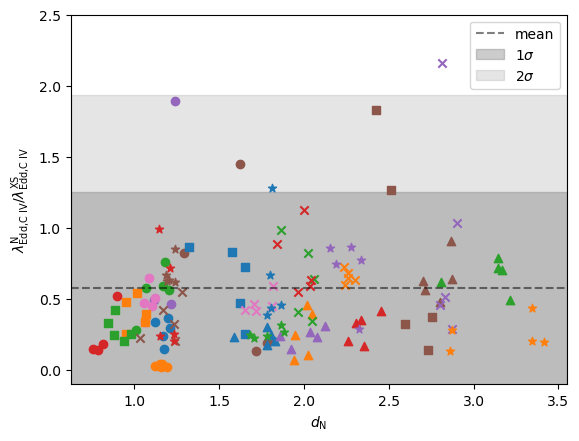

In [98]:
mask1 = data['EDD_CIV_XS'] != -1
# mask2 = data['LOGLEDD_RATIO'] != -100
mask2 = data['MBH_CIV'] != 0
mask = np.logical_and(mask1,mask2)

ledd_civ = 1.3*10**38*10**(data['MBH_CIV'])
ledd_civ_err = ledd_civ*np.log(10)*data['MBH_CIV_ERR']
edd_ratio = (10**data['LOGLBOL'])/ledd_civ
edd_ratio_err = np.sqrt((ledd_civ_err/(ledd_civ)*edd_ratio)**2+(np.log(10)*edd_ratio*data['LOGLBOL_ERR'])**2)
# mask3 = abs(data['LOGLEDD_RATIO']-np.log10(edd_ratio))<10**(-10)
# mask = np.logical_and(mask12,mask3)

j,k,l=-1,-1,0
fig = plt.figure()
RATIO = []
for i, b in enumerate(mask):
    if i % 5 == 0:
        k+=1
        l=0
    if i % 50 == 0:        
        j+=1
        k=0
    if b==False:
        RATIO.append(0)
        continue
    else: d=data[i]
    marker=markers[j]
    alpha=alphas[l]
    l+=1
    redd = edd_ratio[i]   #10**d['LOGLEDD_RATIO']    #edd_ratio[i]     #
    redd_err = edd_ratio_err[i]   #10**d['LOGLEDD_RATIO_ERR']        #edd_ratio_err[i]    #
    ratio = redd/d['EDD_CIV_XS'] 
    plus = np.sqrt((ratio*d['LOGLEDD_RATIO_ERR']*np.log(10))**2+
                   (ratio/d['EDD_CIV_XS']*d['EDD_CIV_XS_plus'])**2)
    minus = np.sqrt((ratio*d['LOGLEDD_RATIO_ERR']*np.log(10))**2+
                   (ratio/d['EDD_CIV_XS']*d['EDD_CIV_XS_minus'])**2)
    # plus = np.sqrt((redd_err/d['EDD_CIV_XS'])**2+(ratio/d['EDD_CIV_XS']*d['EDD_CIV_XS_plus'])**2)
    # minus = np.sqrt((redd_err/d['EDD_CIV_XS'])**2+(ratio/d['EDD_CIV_XS']*d['EDD_CIV_XS_minus'])**2)
    plt.scatter(d['NN_D'],10**d['LOGLEDD_RATIO']/d['EDD_CIV_XS'], c=COLORS[i], marker=MARKERS[i])#,alpha=alpha)#,'ro')
    # plt.errorbar(d['NN_D'],10**d['LOGLEDD_RATIO']/d['EDD_CIV_XS'], yerr=[[minus],[plus]], c=COLORS[i],lw=0.5)#, fmt='o', capsize=5, label='Error Bars')
    # plt.errorbar(d['NN_D'],10**d['LOGLEDD_RATIO']/d['EDD_CIV_XS'], c=colors[k])#, fmt='o', capsize=5, label='Error Bars')
    RATIO.append(ratio)

RATIO=np.array(RATIO)
plt.axhline(np.mean(RATIO[mask]),c='black',ls='--',alpha=0.5,zorder=5,label='mean')
plt.axhspan(np.mean(RATIO[mask])-np.std(RATIO[mask]),np.mean(RATIO[mask])+np.std(RATIO[mask]),color='grey',alpha=0.4,zorder=0,label=r'$1\sigma$')
plt.axhspan(np.mean(RATIO[mask])-2*np.std(RATIO[mask]),np.mean(RATIO[mask])+2*np.std(RATIO[mask]),color='grey',alpha=0.2,zorder=0,label=r'$2\sigma$')
plt.ylabel(r'$\lambda_\text{Edd,fid}^\text{N} / \lambda_\text{Edd,C IV}^\text{XS}$')
plt.xlabel(r'$d_\text{N}$')
plt.ylim(-0.5,5.5)
# plt.savefig('plots/analysis_plots/EDD_RATIO_civ_Lmatched_corr.pdf', bbox_inches='tight')
plt.show()
plt.close()


j,k,l=-1,-1,0
fig = plt.figure()
RATIO=[]
for i, b in enumerate(mask):
    if i % 5 == 0:
        k+=1
        l=0
    if i % 50 == 0:        
        j+=1
        k=0
    if b==False:
        RATIO.append(0)
        continue
    else: d=data[i]
    marker=markers[j]
    alpha=alphas[l]
    l+=1
    redd = edd_ratio[i]   #10**d['LOGLEDD_RATIO']    #edd_ratio[i]     #
    redd_err = edd_ratio_err[i]   #10**d['LOGLEDD_RATIO_ERR']        #edd_ratio_err[i]    #
    ratio = redd/d['EDD_CIV_XS'] 
    if ratio > 3:
        RATIO.append(ratio)
        continue
    plus = np.sqrt((ratio*d['LOGLEDD_RATIO_ERR']*np.log(10))**2+
                   (ratio/d['EDD_CIV_XS']*d['EDD_CIV_XS_plus'])**2)
    minus = np.sqrt((ratio*d['LOGLEDD_RATIO_ERR']*np.log(10))**2+
                   (ratio/d['EDD_CIV_XS']*d['EDD_CIV_XS_minus'])**2)
    # plus = np.sqrt((redd_err/d['EDD_CIV_XS'])**2+(ratio/d['EDD_CIV_XS']*d['EDD_CIV_XS_plus'])**2)
    # minus = np.sqrt((redd_err/d['EDD_CIV_XS'])**2+(ratio/d['EDD_CIV_XS']*d['EDD_CIV_XS_minus'])**2)
    plt.scatter(d['NN_D'],ratio, c=COLORS[i], marker=MARKERS[i])#,alpha=alpha)#,'ro')
    # plt.errorbar(d['NN_D'],ratio, yerr=[[minus],[plus]], c=COLORS[i],lw=0.5)#, fmt='o', capsize=5, label='Error Bars')
    # plt.errorbar(d['NN_D'],10**d['LOGLEDD_RATIO']/d['EDD_CIV_XS'], c=colors[k])#, fmt='o', capsize=5, label='Error Bars')
    RATIO.append(ratio)

RATIO=np.array(RATIO)
plt.axhline(np.mean(RATIO[mask]),c='black',ls='--',alpha=0.5,zorder=5,label='mean')
plt.axhspan(np.mean(RATIO[mask])-np.std(RATIO[mask]),np.mean(RATIO[mask])+np.std(RATIO[mask]),color='grey',alpha=0.4,zorder=0,label=r'$1\sigma$')
plt.axhspan(np.mean(RATIO[mask])-2*np.std(RATIO[mask]),np.mean(RATIO[mask])+2*np.std(RATIO[mask]),color='grey',alpha=0.2,zorder=0,label=r'$2\sigma$')
plt.ylim(-0.1,2.5)
# plt.xlim(0.5,4)
plt.ylabel(r'$\lambda_\text{Edd,C IV}^\text{N} / \lambda_\text{Edd,C IV}^\text{XS}$')
plt.xlabel(r'$d_\text{N}$')
plt.legend(loc='upper right')
# plt.savefig('plots/analysis_plots/EDD_RATIO_civ_Lmatched_corr_zoom.pdf', bbox_inches='tight')
plt.show()
plt.close()

/tmp/ipykernel_6936/2531204436.py:39: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(d['NN_D'],ratio, c=COLORS[i], marker=MARKERS[i])#,alpha=alpha)#,'ro')


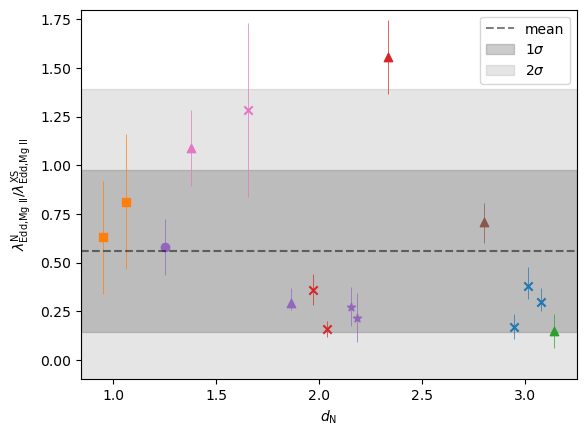

In [93]:
mask1 = data['EDD_MGII_XS'] != -1
# mask2 = data['LOGLEDD_RATIO'] != -100
mask2 = data['MBH_MGII'] != 0
mask = np.logical_and(mask1,mask2)
# print(data['MBH_MGII'])

ledd_mgii = 1.3*10**38*10**(data['MBH_MGII'])
ledd_mgii_err = ledd_mgii*np.log(10)*data['MBH_MGII_ERR']
edd_ratio = (10**data['LOGLBOL'])/ledd_mgii
edd_ratio_err = np.sqrt((ledd_mgii_err/ledd_mgii*edd_ratio)**2+(np.log(10)*edd_ratio*data['LOGLBOL_ERR'])**2)
# mask3 = abs(data['LOGLEDD_RATIO']-np.log10(edd_ratio))<10**(-10)
# mask = np.logical_and(mask12,mask3)

j,k,l=-1,-1,0
fig = plt.figure()
# plt.axhline(1,c='black',ls='--',alpha=0.5)
RATIO=[]
for i, b in enumerate(mask):
    if i % 5 == 0:
        k+=1
        l=0
    if i % 50 == 0:        
        j+=1
        k=0
    if b==False:
        RATIO.append(0)
        continue
    else: d=data[i]
    l+=1    
    redd = edd_ratio[i]     #10**d['LOGLEDD_RATIO']
    redd_err = edd_ratio_err[i]    #10**d['LOGLEDD_RATIO_ERR']     
    ratio = redd/d['EDD_MGII_XS']
    plus = np.sqrt((redd_err/d['EDD_MGII_XS'])**2+(ratio/d['EDD_MGII_XS']*d['EDD_MGII_XS_plus'])**2)
    minus = np.sqrt((redd_err/d['EDD_MGII_XS'])**2+(ratio/d['EDD_MGII_XS']*d['EDD_MGII_XS_minus'])**2)
    # plus = np.sqrt((ratio*d['LOGLEDD_RATIO_ERR']*np.log(10))**2+
    #                (ratio/d['EDD_MGII_XS']*d['EDD_MGII_XS_plus'])**2)
    # minus = np.sqrt((ratio*d['LOGLEDD_RATIO_ERR']*np.log(10))**2+
    #                (ratio/d['EDD_MGII_XS']*d['EDD_MGII_XS_minus'])**2)
    plt.scatter(d['NN_D'],ratio, c=COLORS[i], marker=MARKERS[i])#,alpha=alpha)#,'ro')
    plt.errorbar(d['NN_D'],ratio, yerr=[[minus],[plus]], c=COLORS[i], elinewidth=0.5)
    # plt.errorbar(d['NN_D'],10**d['LOGLEDD_RATIO']/d['EDD_MGII_XS'], c=colors[k])#, fmt='o', capsize=5, label='Error Bars')
    RATIO.append(ratio)

RATIO=np.array(RATIO)
plt.axhline(np.mean(RATIO[mask]),c='black',ls='--',alpha=0.5,zorder=5,label='mean')
plt.axhspan(np.mean(RATIO[mask])-np.std(RATIO[mask]),np.mean(RATIO[mask])+np.std(RATIO[mask]),color='grey',alpha=0.4,zorder=0,label=r'$1\sigma$')
plt.axhspan(np.mean(RATIO[mask])-2*np.std(RATIO[mask]),np.mean(RATIO[mask])+2*np.std(RATIO[mask]),color='grey',alpha=0.2,zorder=0,label=r'$2\sigma$')
plt.ylim(-0.1,1.8)
plt.ylabel(r'$\lambda_\text{Edd,Mg II}^\text{N} / \lambda_\text{Edd,Mg II}^\text{XS}$')
plt.xlabel(r'$d_\text{N}$')
plt.legend()
# plt.savefig('plots/analysis_plots/EDD_RATIO_mgii.pdf', bbox_inches='tight')
plt.show()
plt.close()

# j,k,l=-1,-1,0
# fig = plt.figure()
# # plt.axhline(1,c='black',ls='--',alpha=0.5,zorder=1)
# RATIO2=[]
# for i, b in enumerate(mask):
#     if i % 5 == 0:
#         k+=1
#         l=0
#     if i % 50 == 0:        
#         j+=1
#         k=0
#     if b==False:
#         continue
#     else: d=data[i]
#     l+=1
#     ratio = 10**d['LOGLEDD_RATIO']/d['EDD_MGII_XS']
#     if RATIO[i]>np.mean(RATIO[mask])+2*np.std(RATIO[mask]):
#         continue
#     plus = np.sqrt((ratio*d['LOGLEDD_RATIO_ERR']*np.log(10))**2+
#                    (ratio/d['EDD_MGII_XS']*d['EDD_MGII_XS_plus'])**2)
#     minus = np.sqrt((ratio*d['LOGLEDD_RATIO_ERR']*np.log(10))**2+
#                    (ratio/d['EDD_MGII_XS']*d['EDD_MGII_XS_minus'])**2)
#     plt.scatter(d['NN_D'],10**(d['LOGLEDD_RATIO'])/d['EDD_MGII_XS'], c=COLORS[i], marker=MARKERS[i])#,alpha=alpha)#,'ro')
#     plt.errorbar(d['NN_D'],10**d['LOGLEDD_RATIO']/d['EDD_MGII_XS'], yerr=[[minus],[plus]], c=COLORS[i], elinewidth=0.5)
#     # plt.errorbar(d['NN_D'],10**d['LOGLEDD_RATIO']/d['EDD_MGII_XS'], c=colors[k])#, fmt='o', capsize=5, label='Error Bars')
#     RATIO2.append(ratio)


# plt.axhline(np.mean(RATIO2),c='black',ls='--',alpha=0.5,zorder=5,label='mean')
# plt.axhspan(np.mean(RATIO2)-np.std(RATIO2),np.mean(RATIO2)+np.std(RATIO2),color='grey',alpha=0.4,zorder=0,label=r'$1\sigma$')
# plt.axhspan(np.mean(RATIO2)-2*np.std(RATIO2),np.mean(RATIO2)+2*np.std(RATIO2),color='grey',alpha=0.2,zorder=0,label=r'$2\sigma$')
# # plt.ylim(np.mean(RATIO)-2*np.std(RATIO),np.mean(RATIO)+2*np.std(RATIO))
# # plt.ylim(0,2)
# # plt.xlim(0.5,3.5)
# plt.ylabel(r'$\lambda_\text{Edd,fid}^\text{NN} / \lambda_\text{Edd,Mg II}^\text{XS}$')
# plt.xlabel(r'$d_\text{N}$')
# plt.legend()
# # plt.savefig('plots/analysis_plots/EDD_RATIO_mgii_Lmatched_corr_trim.pdf', bbox_inches='tight')
# plt.show()
# plt.close()

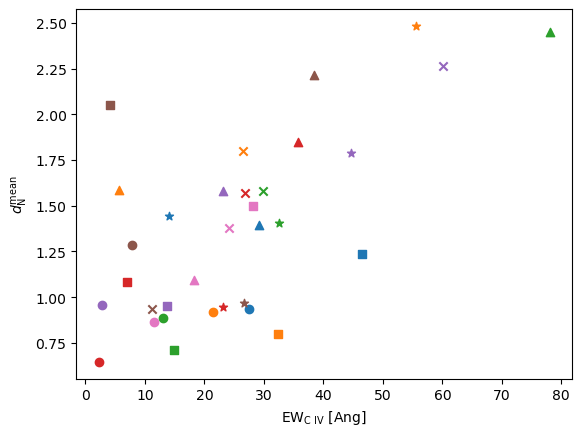

In [38]:
mask = data['CIV_EW']!=0

def poly(x,a,b,c):
    return a*x**2+b*x+c

def linear(x,b,c):
    return b*x+c

dN_sum=0
means,EWs=[],[]
for i,b in enumerate(mask):
    if b == False:
        continue
    d = data[i]

    if (i+1)%5 == 0:
        dN_mean = dN_sum/5
        means.append(dN_mean)
        EWs.append(d['CIV_EW'])
        plt.scatter(d['CIV_EW'],dN_mean,color=COLORS[i],marker=MARKERS[i]) 
        dN_sum=0
        # plt.errorbar(d['CIV_EW'],dN_mean,xerr=d['CIV_EW']*0.2,color=COLORS[i],marker=MARKERS[i],lw=0.5)
    else:
        dN_sum+=d['NN_D']

xvalues = np.linspace(2,75,100)
popt,pcov=curve_fit(poly,np.array(EWs),np.array(means))#,sigma=np.ones(len(means))*10)
popt1,pcov1=curve_fit(linear,np.array(EWs),np.array(means))#,sigma=np.ones(len(means))*10)
# plt.plot(xvalues,poly(np.array(xvalues),*popt))
# plt.plot(xvalues,linear(np.array(xvalues),*popt1))
# plt.ylim(-2,2)
plt.ylabel(r'$d_\text{N}^\text{mean}$')
plt.xlabel(r'$\text{EW}_\text{C IV}$ [Ang]')
plt.savefig('plots/analysis_plots/EW_dN_Lmatched_corr.pdf', bbox_inches='tight')
plt.show()

/tmp/ipykernel_6936/4034399559.py:46: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter((d['LOGLBOL']-d['LOGLBOL_XS']),ratio, c=COLORS[i], marker=MARKERS[i])#,alpha=alpha)#,'ro')


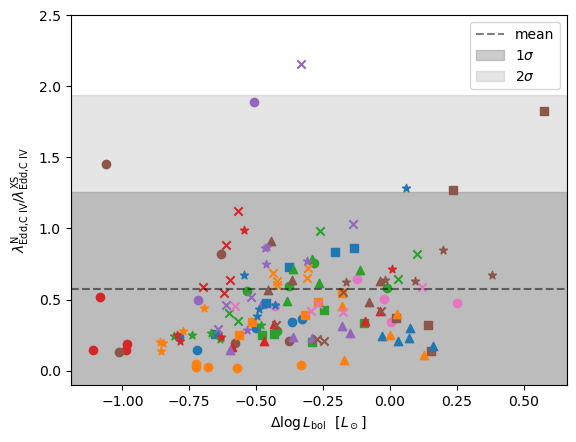

/tmp/ipykernel_6936/4034399559.py:98: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(d['LOGLBOL']-d['LOGLBOL_XS'],ratio, c=COLORS[i], marker=MARKERS[i])#,alpha=alpha)#,'ro')


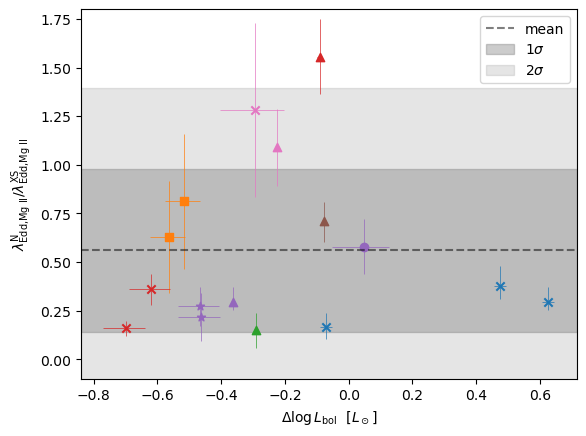

In [103]:
mask1 = data['EDD_CIV_XS'] != -1
# mask2 = data['LOGLEDD_RATIO'] != -100
mask2 = data['MBH_CIV'] != 0
mask = np.logical_and(mask1,mask2)

ledd_civ = 1.3*10**38*10**(data['MBH_CIV'])
ledd_civ_err = ledd_civ*np.log(10)*data['MBH_CIV_ERR']
edd_ratio = (10**data['LOGLBOL'])/ledd_civ
edd_ratio_err = np.sqrt((ledd_civ_err/(ledd_civ)*edd_ratio)**2+(np.log(10)*edd_ratio*data['LOGLBOL_ERR'])**2)

j,k,l=-1,-1,0
fig = plt.figure()
RATIO=[]
for i, b in enumerate(mask):
    if i % 5 == 0:
        k+=1
        l=0
    if i % 50 == 0:        
        j+=1
        k=0
    if b==False:
        RATIO.append(0)
        continue
    else: d=data[i]
    marker=markers[j]
    alpha=alphas[l]
    l+=1
    redd = edd_ratio[i]     #10**d['LOGLEDD_RATIO']    #
    redd_err = edd_ratio_err[i]    #10**d['LOGLEDD_RATIO_ERR']        #
    ratio = redd/d['EDD_CIV_XS'] 
    if ratio > 3:
        RATIO.append(ratio)
        continue
    plus = np.sqrt((ratio*d['LOGLEDD_RATIO_ERR']*np.log(10))**2+
                   (ratio/d['EDD_CIV_XS']*d['EDD_CIV_XS_plus'])**2)
    minus = np.sqrt((ratio*d['LOGLEDD_RATIO_ERR']*np.log(10))**2+
                   (ratio/d['EDD_CIV_XS']*d['EDD_CIV_XS_minus'])**2)

    # minus=np.sqrt(d['LOGLBOL_ERR']**2+d['LOGLBOL_XS_minus']**2)
    # plus=np.sqrt(d['LOGLBOL_ERR']**2+d['LOGLBOL_XS_plus']**2)
    # plt.scatter(d['NN_D'],d['LOGLBOL']-d['LOGLBOL_XS'],color=COLORS[i],marker=MARKERS[i])
    # plt.errorbar(d['NN_D'],d['LOGLBOL']-d['LOGLBOL_XS'],yerr=[[minus],[plus]],color=COLORS[i],marker=MARKERS[i],lw=0.5)

    # plus = np.sqrt((redd_err/d['EDD_CIV_XS'])**2+(ratio/d['EDD_CIV_XS']*d['EDD_CIV_XS_plus'])**2)
    # minus = np.sqrt((redd_err/d['EDD_CIV_XS'])**2+(ratio/d['EDD_CIV_XS']*d['EDD_CIV_XS_minus'])**2)
    plt.scatter((d['LOGLBOL']-d['LOGLBOL_XS']),ratio, c=COLORS[i], marker=MARKERS[i])#,alpha=alpha)#,'ro')
    # plt.errorbar(d['NN_D'],ratio, yerr=[[minus],[plus]], c=COLORS[i],lw=0.5)#, fmt='o', capsize=5, label='Error Bars')
    # plt.errorbar(d['NN_D'],10**d['LOGLEDD_RATIO']/d['EDD_CIV_XS'], c=colors[k])#, fmt='o', capsize=5, label='Error Bars')
    RATIO.append(ratio)

RATIO=np.array(RATIO)
plt.axhline(np.mean(RATIO[mask]),c='black',ls='--',alpha=0.5,zorder=5,label='mean')
plt.axhspan(np.mean(RATIO[mask])-np.std(RATIO[mask]),np.mean(RATIO[mask])+np.std(RATIO[mask]),color='grey',alpha=0.4,zorder=0,label=r'$1\sigma$')
plt.axhspan(np.mean(RATIO[mask])-2*np.std(RATIO[mask]),np.mean(RATIO[mask])+2*np.std(RATIO[mask]),color='grey',alpha=0.2,zorder=0,label=r'$2\sigma$')
plt.ylim(-0.1,2.5)
# plt.xlim(0.5,4)
plt.ylabel(r'$\lambda_\text{Edd,C IV}^\text{N} / \lambda_\text{Edd,C IV}^\text{XS}$')
plt.xlabel(r'$\Delta \log L_\text{bol}$  [$L_\odot$]')
plt.legend(loc='upper right')
plt.savefig('plots/analysis_plots/EDD_RATIO_civ_Lmatched_corr_Lbol.pdf', bbox_inches='tight')
plt.show()
plt.close()




mask1 = data['EDD_MGII_XS'] != -1
mask2 = data['MBH_MGII'] != 0
mask = np.logical_and(mask1,mask2)

ledd_mgii = 1.3*10**38*10**(data['MBH_MGII'])
ledd_mgii_err = ledd_mgii*np.log(10)*data['MBH_MGII_ERR']
edd_ratio = (10**data['LOGLBOL'])/ledd_mgii
edd_ratio_err = np.sqrt((ledd_mgii_err/ledd_mgii*edd_ratio)**2+(np.log(10)*edd_ratio*data['LOGLBOL_ERR'])**2)

j,k,l=-1,-1,0
fig = plt.figure()
RATIO=[]
for i, b in enumerate(mask):
    if i % 5 == 0:
        k+=1
        l=0
    if i % 50 == 0:        
        j+=1
        k=0
    if b==False:
        RATIO.append(0)
        continue
    else: d=data[i]
    l+=1    
    redd = edd_ratio[i]     #10**d['LOGLEDD_RATIO']
    redd_err = edd_ratio_err[i]    #10**d['LOGLEDD_RATIO_ERR']     
    ratio = redd/d['EDD_MGII_XS']
    yplus = np.sqrt((redd_err/d['EDD_MGII_XS'])**2+(ratio/d['EDD_MGII_XS']*d['EDD_MGII_XS_plus'])**2)
    yminus = np.sqrt((redd_err/d['EDD_MGII_XS'])**2+(ratio/d['EDD_MGII_XS']*d['EDD_MGII_XS_minus'])**2)
    xminus=np.sqrt(d['LOGLBOL_ERR']**2+d['LOGLBOL_XS_minus']**2)
    xplus=np.sqrt(d['LOGLBOL_ERR']**2+d['LOGLBOL_XS_plus']**2)
    plt.scatter(d['LOGLBOL']-d['LOGLBOL_XS'],ratio, c=COLORS[i], marker=MARKERS[i])#,alpha=alpha)#,'ro')
    plt.errorbar(d['LOGLBOL']-d['LOGLBOL_XS'],ratio, xerr=[[xminus],[xplus]],yerr=[[yminus],[yplus]], c=COLORS[i], elinewidth=0.5)
    RATIO.append(ratio)

RATIO=np.array(RATIO)
plt.axhline(np.mean(RATIO[mask]),c='black',ls='--',alpha=0.5,zorder=5,label='mean')
plt.axhspan(np.mean(RATIO[mask])-np.std(RATIO[mask]),np.mean(RATIO[mask])+np.std(RATIO[mask]),color='grey',alpha=0.4,zorder=0,label=r'$1\sigma$')
plt.axhspan(np.mean(RATIO[mask])-2*np.std(RATIO[mask]),np.mean(RATIO[mask])+2*np.std(RATIO[mask]),color='grey',alpha=0.2,zorder=0,label=r'$2\sigma$')
plt.ylim(-0.1,1.8)
plt.ylabel(r'$\lambda_\text{Edd,Mg II}^\text{N} / \lambda_\text{Edd,Mg II}^\text{XS}$')
plt.xlabel(r'$\Delta \log L_\text{bol}$  [$L_\odot$]')
plt.legend()
plt.savefig('plots/analysis_plots/EDD_RATIO_mgii_Lmatched_corr_Lbol.pdf', bbox_inches='tight')
plt.show()
plt.close()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True, False,  True,  True,  True, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True,  True,

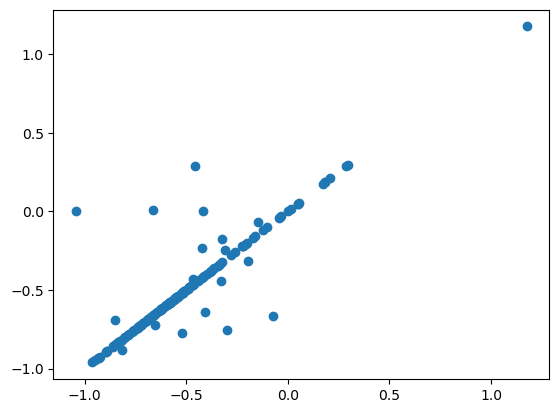

In [83]:
ledd_civ = 1.3*10**38*10**(data['MBH_CIV'])
ledd_civ_err = ledd_civ*np.log(10)*data['MBH_CIV_ERR']
edd_ratio = (10**data['LOGLBOL'])/ledd_civ
edd_ratio_err = np.sqrt((ledd_civ_err/(ledd_civ)*edd_ratio)**2+(np.log(10)*edd_ratio*data['LOGLBOL_ERR'])**2)
redd = 10**data['LOGLEDD_RATIO'] 

plt.scatter(data['LOGLEDD_RATIO'],np.log10(edd_ratio))
abs(data['LOGLEDD_RATIO']-np.log10(edd_ratio))<10**(-10)